In [30]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import requests
requests.__version__

'2.23.0'

In [31]:
!pip install citipy

In [43]:
# Import the API key.
#from config import weather_api_key
weather_api_key = "14d74e63ae16c29d1de534c67d90e2fe"

In [33]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [34]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [35]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [36]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [37]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cabo san lucas mx
kenai us
bengkulu id
gamba ga
albany au
luderitz na
bredasdorp za
barrow us
abu kamal sy
nikolskoye ru
cabo san lucas mx
eureka us
puerto ayora ec
rikitea pf
caravelas br
busselton au
aklavik ca
tura ru
avarua ck
soe id
hobart au
cape town za
launceston au
jamestown sh
klaksvik fo
ribeira grande pt
atuona pf
puerto ayora ec
kamenskoye ru
college us
new norfolk au
jalu ly
elizabeth city us
moindou nc
yumen cn
hami cn
ushuaia ar
labuhan id
mehamn no
hilo us
samalaeulu ws
leon valley us
kaitangata nz
bluff nz
punta arenas cl
bluff nz
norman us
cape town za
pangody ru
cape town za
cozumel mx
dikson ru
lasa cn
tautira pf
cayenne gf
punta arenas cl
lebu cl
hilo us
rikitea pf
mataura pf
atuona pf
rikitea pf
pocone br
rikitea pf
hithadhoo mv
hithadhoo mv
busselton au
gazalkent uz
qaqortoq gl
arlit ne
gogrial sd
nizhneyansk ru
vila do maio cv
taolanaro mg
narayanpet in
bathsheba bb
kaitangata nz
yellowknife ca
norman wells ca
port hardy ca
camacha pt
morwell au
medvedovskaya r

In [38]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

In [44]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14d74e63ae16c29d1de534c67d90e2fe


In [45]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14d74e63ae16c29d1de534c67d90e2fe&q=Boston


In [46]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [47]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [48]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [49]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"base":"stations","main":{"temp":69.51,"feels_like":61.92,"temp_min":66.99,"temp_max":72,"pressure":1021,"humidity":37},"visibility":10000,"wind":{"speed":10.29,"deg":320},"clouds":{"all":20},"dt":1599316039,"sys":{"type":1,"id":3486,"country":"US","sunrise":1599300858,"sunset":1599347498},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [50]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 42.36, 'lon': -71.06},
 'dt': 1599316039,
 'id': 4930956,
 'main': {'feels_like': 61.92,
  'humidity': 37,
  'pressure': 1021,
  'temp': 69.51,
  'temp_max': 72,
  'temp_min': 66.99},
 'name': 'Boston',
 'sys': {'country': 'US',
  'id': 3486,
  'sunrise': 1599300858,
  'sunset': 1599347498,
  'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
   'icon': '02d',
   'id': 801,
   'main': 'Clouds'}],
 'wind': {'deg': 320, 'speed': 10.29}}

In [51]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [52]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [53]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 42.36, 'lon': -71.06},
 'dt': 1599317090,
 'id': 4930956,
 'main': {'feels_like': 62.82,
  'humidity': 37,
  'pressure': 1021,
  'temp': 70.27,
  'temp_max': 73,
  'temp_min': 68},
 'name': 'Boston',
 'sys': {'country': 'US',
  'id': 3486,
  'sunrise': 1599300858,
  'sunset': 1599347498,
  'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
   'icon': '02d',
   'id': 801,
   'main': 'Clouds'}],
 'wind': {'deg': 320, 'speed': 10.29}}

In [54]:
# Get the JSON data.
boston_data = city_weather.json()

In [55]:
boston_data['sys']

{'country': 'US',
 'id': 3486,
 'sunrise': 1599300858,
 'sunset': 1599347498,
 'type': 1}

In [56]:
boston_data['sys']["country"]

'US'

In [57]:
boston_data["dt"]

1599317090

In [58]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 73 37 20 10.29


In [59]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 9, 5, 14, 44, 50)

In [60]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [61]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [62]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [65]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 40 of Set 23 | cabo san lucas
Processing Record 41 of Set 23 | kenai
Processing Record 42 of Set 23 | bengkulu
Processing Record 43 of Set 23 | gamba
Processing Record 44 of Set 23 | albany
Processing Record 45 of Set 23 | luderitz
Processing Record 46 of Set 23 | bredasdorp
Processing Record 47 of Set 23 | barrow
Processing Record 48 of Set 23 | abu kamal
Processing Record 49 of Set 23 | nikolskoye
Processing Record 50 of Set 23 | eureka
Processing Record 51 of Set 23 | puerto ayora
Processing Record 52 of Set 23 | rikitea
Processing Record 53 of Set 23 | caravelas
Processing Record 54 of Set 23 | busselton
Processing Record 55 of Set 23 | aklavik
Processing Record 56 of Set 23 | tura
Processing Record 57 of Set 23 | avarua
Processing Record 58 of Set 23 | soe
Processing Record 59 of Set 23 | hobart
Processing Record 60 of Set 23 | cape town
Processing Record 61 of Set 23 | launceston
Processing Record 62 of Set 23 | jamestown
Processing Record 63 of Set 23 | klaksvi

In [66]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabo San Lucas,22.89,-109.91,84.99,66,20,5.82,MX,2020-09-05 15:13:56
1,Kenai,60.55,-151.26,35.60,86,1,2.80,US,2020-09-05 15:13:56
2,Bengkulu,-3.80,102.27,77.05,88,97,2.89,ID,2020-09-05 15:12:05
3,Gamba,-2.65,10.00,76.12,75,96,8.16,GA,2020-09-05 15:13:57
4,Albany,42.60,-73.97,69.01,50,0,5.50,US,2020-09-05 15:13:57
5,Luderitz,-26.65,15.16,64.20,56,0,29.19,NA,2020-09-05 15:13:57
6,Bredasdorp,-34.53,20.04,55.40,87,100,11.41,ZA,2020-09-05 15:13:57
7,Barrow,71.29,-156.79,37.40,93,90,4.70,US,2020-09-05 15:13:58
8,Abu Kamal,34.45,40.92,102.85,8,0,5.57,SY,2020-09-05 15:13:58
9,Nikolskoye,59.70,30.79,66.20,63,75,11.18,RU,2020-09-05 15:13:58


In [75]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [70]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [71]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1599319528.2508843

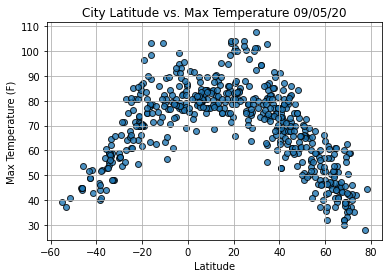

In [74]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

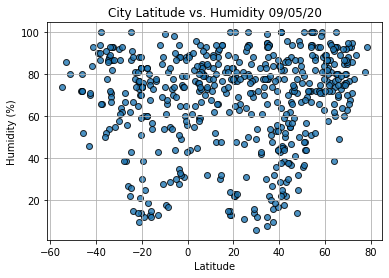

In [76]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

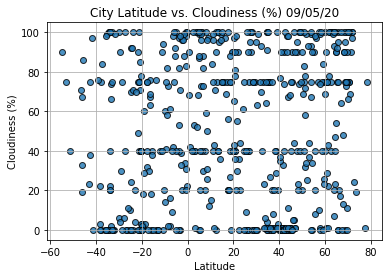

In [77]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

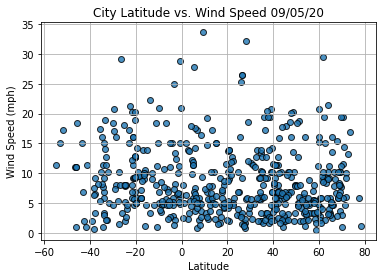

In [78]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()